### Statistical Analysis of Fire Intensity Model (Clean) Data Set

### First Step - Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt, time
import matplotlib.mlab as mlab
import matplotlib.style as stl
import matplotlib.image as mpimg
from numpy import median
from numpy.random import randn
from scipy import stats
from sklearn import preprocessing
from pandas.plotting import scatter_matrix

sns.set(style="ticks", color_codes=True)

%matplotlib inline

### Second Step - Loading and Checking the Data - Limiting Sample

In [2]:
# Load Fire Intensity Model CSV File
emstat = pd.read_csv('FireIntensity_Model_June12_Clean.csv').sample(250000)

In [3]:
# Use pandas to view the first 5 rows of the file
emstat.head(5)

,Unnamed: 0,latitude,longitude,doy,month,year,cluster_reference,fire_region,season,covertype,...,visibility,wind_speed,wind_gust,brightness,fire_intensity,fire_intensity_twocat,fire_intensity_threecat,fire_intensity_fourcat,bright_t31,frp
1004572,1004572,45.6450,-115.4935,244,8,2012,2012_602,1,1,3,...,1.232000,2.72,6.24,364.4,Severe,Moderate,Low,Moderate,300.3,100.4
1080743,1080743,32.9162,-107.7923,162,6,2013,2013_101,4,0,3,...,9.216293,6.09,11.91,320.5,High,Moderate,Low,Low,291.4,17.4
1036711,1036711,36.3273,-112.0739,311,11,2012,2012_246,4,2,3,...,9.997000,3.49,6.74,321.4,High,Moderate,Low,Low,289.7,18.8
715380,715380,33.0503,-103.5778,20,1,2010,2010_259,3,3,1,...,9.216293,31.19,43.21,308.7,Low,Moderate,Low,Low,289.9,22.1
899454,899454,48.2268,-97.5354,295,10,2011,2011_10506,7,2,3,...,3.351000,14.79,17.58,359.4,Severe,Moderate,Low,Moderate,292.6,105.4


In [4]:
# What are the dtypes of the columns?
emstat.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250000 entries, 1004572 to 56444
Data columns (total 26 columns):
Unnamed: 0                 250000 non-null int64
latitude                   250000 non-null float64
longitude                  250000 non-null float64
doy                        250000 non-null int64
month                      250000 non-null int64
year                       250000 non-null int64
cluster_reference          250000 non-null object
fire_region                250000 non-null int64
season                     250000 non-null int64
covertype                  250000 non-null int64
fuelcode                   250000 non-null int64
prefire_fuel               250000 non-null float64
fuel_moisture_class        250000 non-null int64
temperature                250000 non-null float64
humidity                   250000 non-null float64
precip_intensity           250000 non-null float64
visibility                 250000 non-null float64
wind_speed                 250000 no

In [5]:
# Determine the shape of the data
print("{} instances with {} features\n".format(*emstat.shape))

250000 instances with 26 features



In [6]:
# Checking to see how many years comprise the file
print(emstat['year'].unique())

[2012 2013 2010 2011 2004 2015 2007 2009 2008 2005 2014 2003 2006]


In [7]:
# Reduce columns to focus on most important features
emstat = emstat.drop(columns=['Unnamed: 0','visibility','precip_intensity','fuel_moisture_class','doy','fire_region'])

In [8]:
emstat.shape

(250000, 20)

### Description of Top-Level Key Statistics

In [9]:
# Use pandas to get the summary statistics on the data
emstat.describe()

,latitude,longitude,month,year,season,covertype,fuelcode,prefire_fuel,temperature,humidity,wind_speed,wind_gust,brightness,bright_t31,frp
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,37.079823,-99.440109,6.576264,2009.048420,1.329824,2.346952,830.107984,3854.872265,69.938273,0.410682,6.370880,11.687210,323.846104,295.822878,58.632009
std,5.853235,13.979797,3.054570,3.659152,1.047090,0.879506,709.109297,3008.389085,14.978584,0.167988,4.146483,6.053379,22.200028,9.552046,182.292242
min,24.545700,-124.612600,1.000000,2003.000000,0.000000,1.000000,1.000000,19.727136,-28.970000,0.030000,0.000000,0.000000,300.000000,264.500000,-59.200000
25%,32.398575,-114.136100,4.000000,2006.000000,0.000000,1.000000,1.000000,320.902218,60.620000,0.290000,3.550000,7.460000,309.800000,290.200000,10.200000
50%,35.936650,-96.252900,7.000000,2009.000000,1.000000,3.000000,1160.000000,4335.068543,70.370000,0.400000,5.430000,10.890000,317.900000,295.500000,20.400000
75%,41.634700,-87.841375,9.000000,2012.000000,2.000000,3.000000,1280.000000,6989.973251,79.500000,0.530000,8.110000,14.430000,330.200000,300.700000,47.300000
max,48.992400,-67.131200,12.000000,2015.000000,3.000000,3.000000,2950.000000,13337.510830,122.180000,1.000000,66.300000,137.970000,505.700000,400.100000,11152.600000


### Identifying Most Important Features

In [10]:
# A look at what the cover type looks like - with the rankings from 1 (low) to 3 (highest)
emstat['covertype'].value_counts()

3    155107
1     68369
2     26524
Name: covertype, dtype: int64

In [11]:
# A look at what the cover type looks like - with the rankings from 1 (low) to 2900 (highest)
emstat['fuelcode'].value_counts()

1       70180
1160    33717
2       27123
1500    25456
1200    16735
1140    14696
1220    10641
1370    10069
1260     8397
1600     6624
1400     5832
1180     4645
1280     4026
2700     3737
1920     3035
2900     1598
1800     1131
1900      570
1100      345
1300      273
2180      231
1120      196
1360      152
1940      121
1950      112
2950      110
1910       82
1320       67
1340       41
1700       35
1980       17
1990        6
Name: fuelcode, dtype: int64

In [12]:
# Show the data by cover type
print(emstat.groupby('covertype').count())

           latitude  longitude   month    year  cluster_reference  season  \
covertype                                                                   
1             68369      68369   68369   68369              68369   68369   
2             26524      26524   26524   26524              26524   26524   
3            155107     155107  155107  155107             155107  155107   

           fuelcode  prefire_fuel  temperature  humidity  wind_speed  \
covertype                                                              
1             68369         68369        68369     68369       68369   
2             26524         26524        26524     26524       26524   
3            155107        155107       155107    155107      155107   

           wind_gust  brightness  fire_intensity  fire_intensity_twocat  \
covertype                                                                 
1              68369       68369           68369                  68369   
2              26524       2

In [13]:
# These features all increase with each other - no inverse relationships
emstat[['wind_speed', 'wind_gust', 'brightness', 'bright_t31']].agg(['mean','min','max'])

,wind_speed,wind_gust,brightness,bright_t31
mean,6.37088,11.68721,323.846104,295.822878
min,0.00000,0.00000,300.000000,264.500000
max,66.30000,137.97000,505.700000,400.100000


### Fire Intensity Categories Measured Against Data Set Features

In [14]:
# Show the data by fire_intensity 
print(emstat.groupby('fire_intensity').count())

                latitude  longitude  month   year  cluster_reference  season  \
fire_intensity                                                                 
High               62895      62895  62895  62895              62895   62895   
Low                62832      62832  62832  62832              62832   62832   
Medium             61683      61683  61683  61683              61683   61683   
Severe             62590      62590  62590  62590              62590   62590   

                covertype  fuelcode  prefire_fuel  temperature  humidity  \
fire_intensity                                                             
High                62895     62895         62895        62895     62895   
Low                 62832     62832         62832        62832     62832   
Medium              61683     61683         61683        61683     61683   
Severe              62590     62590         62590        62590     62590   

                wind_speed  wind_gust  brightness  fire_intens

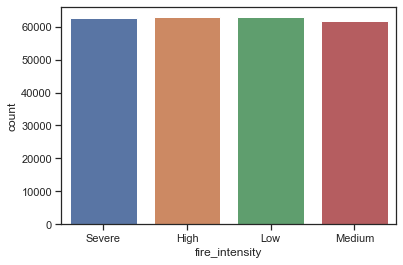

In [15]:
# Fire Intensity by category
sns.countplot(emstat['fire_intensity'],label="Count")
plt.show()

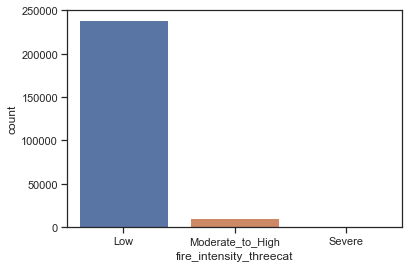

In [16]:
sns.countplot(emstat['fire_intensity_threecat'],label="Count")
plt.show()

### Looking at Histograms illustrating key Fire Intensity features

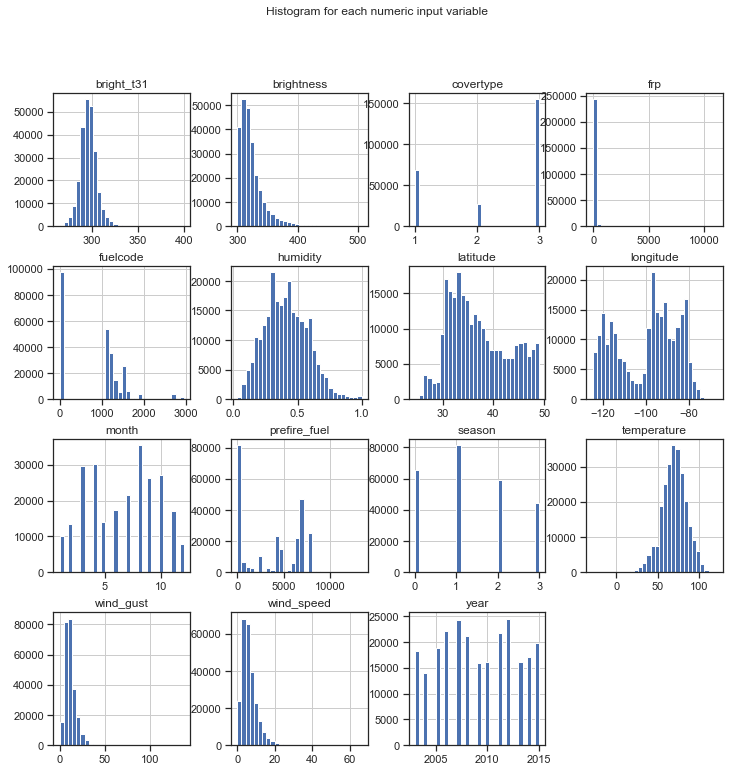

In [17]:
# Historgram of all numerical data
emstat.hist(bins=30, figsize=(12,12))
plt.suptitle("Histogram for each numeric input variable")
plt.show()

### Limiting the dataset again - this time within the state of California for processing efficiency
#### * This step reduces the number of instances from 250,000 to 61,234 

In [18]:
# Limiting data to state of California
emstat_west = emstat[(emstat.latitude > 34) & (emstat.longitude < -114)]

In [19]:
# Did we reduce the size of the data?
emstat_west.shape

(61156, 20)

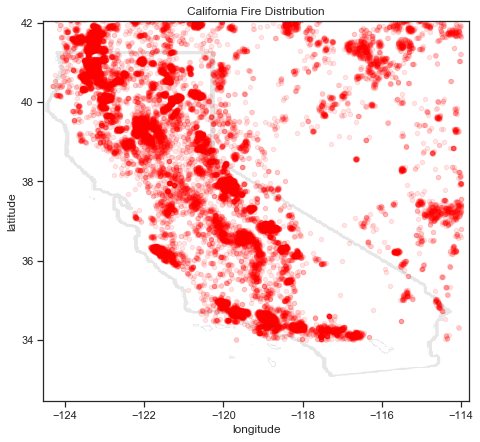

In [20]:
# California Fire Distribution Map

california_img=mpimg.imread('CaliforniaMapOutline.gif')
emstat_west.plot(kind="scatter", x="longitude", y="latitude", c= "red", figsize=(10,7), alpha=0.1)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.1)
plt.title('California Fire Distribution') 
plt.show()

### Following three (3) Pair Plots showing pairwise relationships between three select primary features

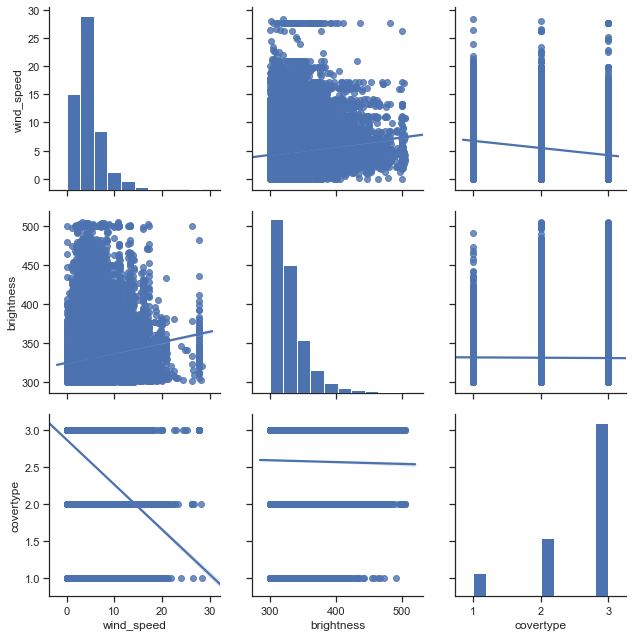

In [21]:
# Pairplot Analysis Part 1
g = sns.pairplot(emstat_west, height=3, vars=['wind_speed','brightness','covertype'], kind="reg")

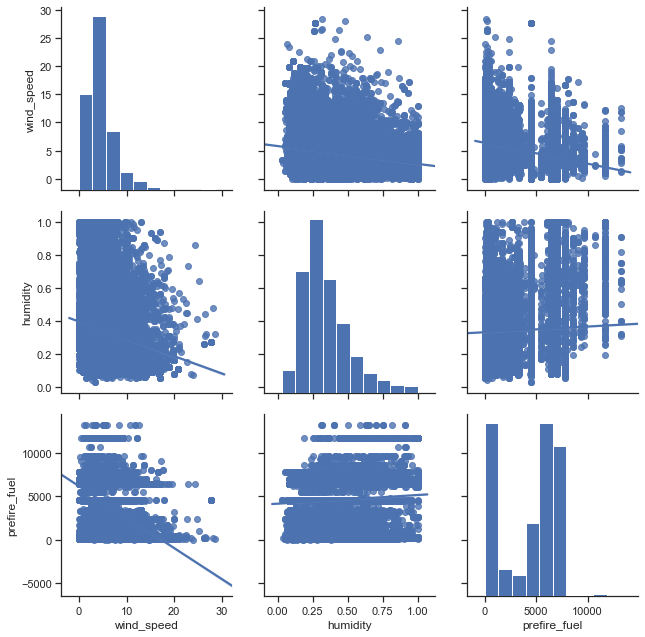

In [22]:
# Pairplot Analysis Part 2
g = sns.pairplot(emstat_west, height=3, vars=['wind_speed','humidity','prefire_fuel'], kind="reg")

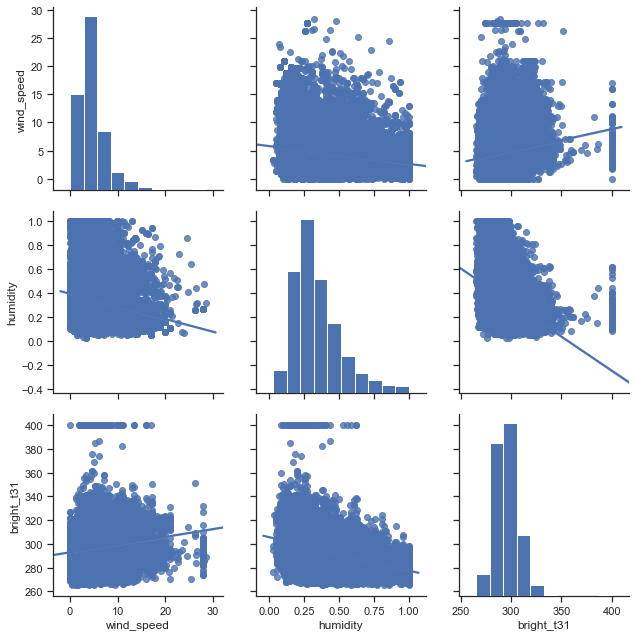

In [23]:
# Pairplot Analysis Part 3
g = sns.pairplot(emstat_west, height=3, vars=['wind_speed','humidity','bright_t31'], kind="reg")

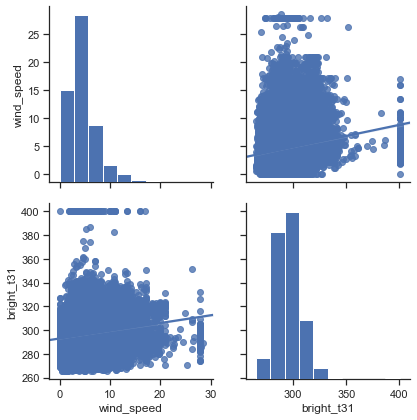

In [24]:
# Pairplot Analysis Part 4
g = sns.pairplot(emstat_west, height=3, vars=['wind_speed','bright_t31'], kind="reg")

### Statistical Correlation of Fire Intensity Measures of Performance

#### * The group indicated that humidity, wind speed, prefire-fuel, brightness, and cover type are the preferred features

In [25]:
# Correlation Analysis of key intensity indicators part 1
x_values = emstat_west['humidity']
y_values = emstat_west['wind_speed']
z_values = emstat_west['prefire_fuel']

correlation_matrix1 = np.corrcoef(x_values, y_values)
correlation_matrix2 = np.corrcoef(x_values, z_values)
correlation_matrix3 = np.corrcoef(y_values, z_values)
correlation_xy = correlation_matrix1[0,1]
correlation_xz = correlation_matrix2[0,1]
correlation_yz = correlation_matrix3[0,1]
r_squared1 = correlation_xy**2
r_squared2 = correlation_xz**2
r_squared3 = correlation_yz**2

print(f"R2 Correlation of humidity and windspeed: {r_squared1:.9f}")
print(f"R2 Correlation of humidity and prefire_fuel: {r_squared2:.9f}")
print(f"R2 Correlation of wind_speed and prefire_fuel: {r_squared3:.9f}")

R2 Correlation of humidity and windspeed: 0.033331054
R2 Correlation of humidity and prefire_fuel: 0.003430520
R2 Correlation of wind_speed and prefire_fuel: 0.132634239


In [26]:
# Correlation Analysis of key intensity indicators part 2
x_values = emstat_west['wind_speed']
y_values = emstat_west['bright_t31']
z_values = emstat_west['fuelcode']

correlation_matrix1 = np.corrcoef(x_values, y_values)
correlation_matrix2 = np.corrcoef(x_values, z_values)
correlation_matrix3 = np.corrcoef(y_values, z_values)
correlation_xy = correlation_matrix1[0,1]
correlation_xz = correlation_matrix2[0,1]
correlation_yz = correlation_matrix3[0,1]
r_squared1 = correlation_xy**2
r_squared2 = correlation_xz**2
r_squared3 = correlation_yz**2

print(f"R2 Correlation of windspeed and bright_t31: {r_squared1:.9f}")
print(f"R2 Correlation of windspeed and fuelcode: {r_squared2:.9f}")
print(f"R2 Correlation of bright_t31 and fuelcode: {r_squared3:.9f}")

R2 Correlation of windspeed and bright_t31: 0.025808332
R2 Correlation of windspeed and fuelcode: 0.118704540
R2 Correlation of bright_t31 and fuelcode: 0.032852197


### Visualizing the distribution with five Kernal Density Estimates

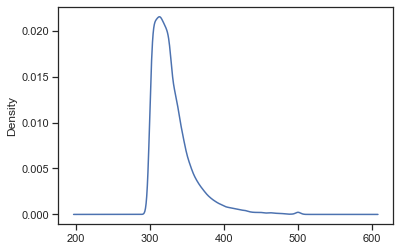

In [27]:
emstat_west['brightness'].plot(kind='kde')

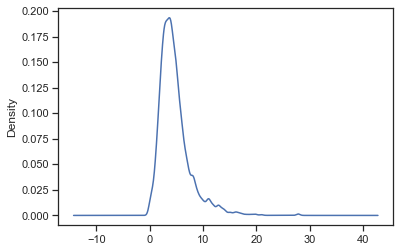

In [28]:
emstat_west['wind_speed'].plot(kind='kde')

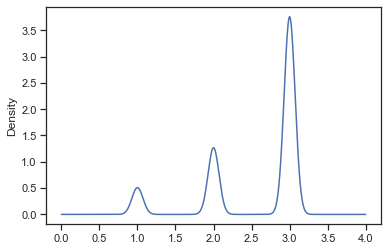

In [29]:
emstat_west['covertype'].plot(kind='kde')

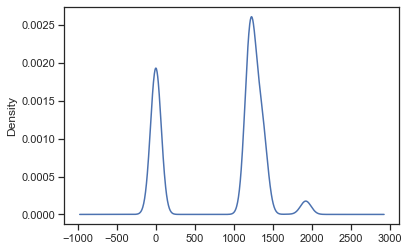

In [30]:
emstat_west['fuelcode'].plot(kind='kde')

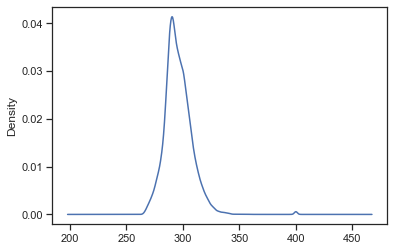

In [31]:
emstat_west['bright_t31'].plot(kind='kde')

### Scatter Plot Matrix to show multiple visualizations between fire intensity features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002386184D0C8>,
      dtype=object)

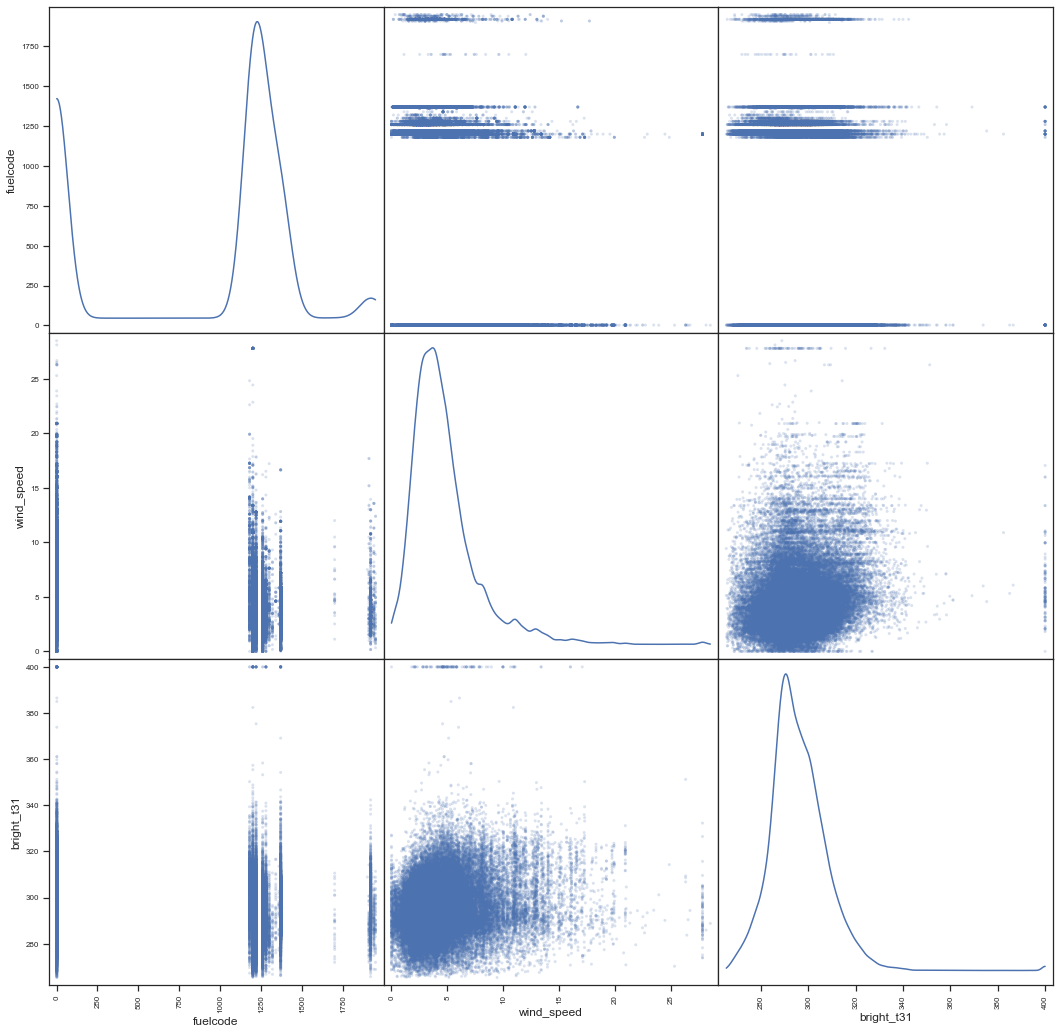

In [32]:
areas = emstat_west[['fuelcode','wind_speed','bright_t31']]
scatter_matrix(areas, alpha=0.2, figsize=(18,18), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002384A3EEF48>,
      dtype=object)

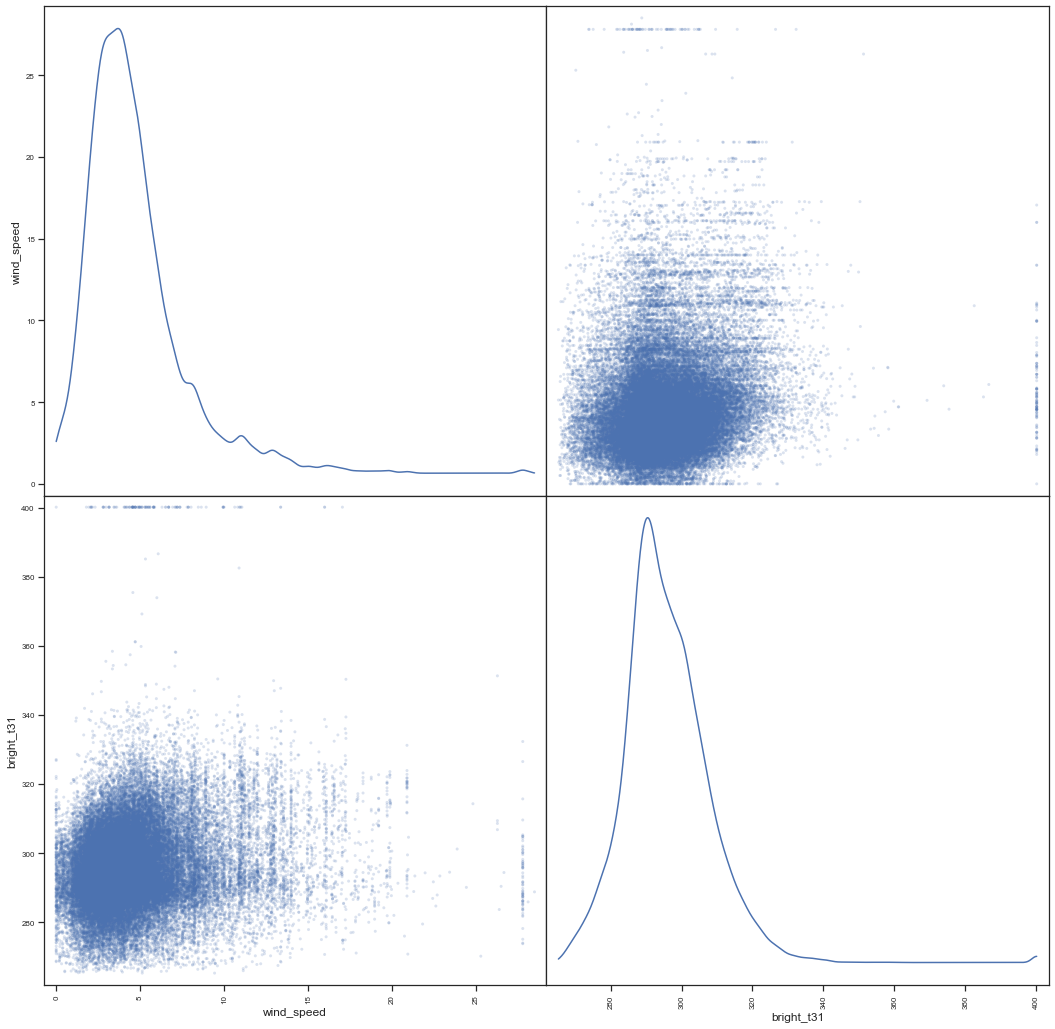

In [33]:
areas = emstat_west[['wind_speed','bright_t31']]
scatter_matrix(areas, alpha=0.2, figsize=(18,18), diagonal='kde')

### Following Joint Plots shows pairwise relationships between two alternating features

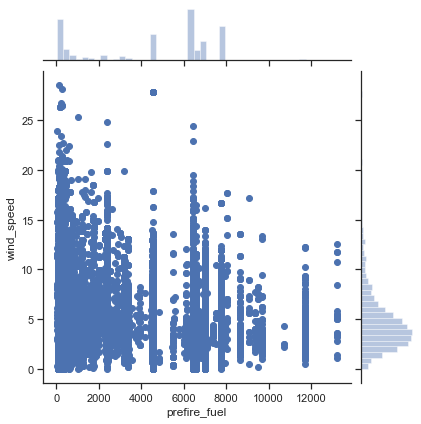

In [34]:
g = sns.jointplot("prefire_fuel", "wind_speed", emstat_west)

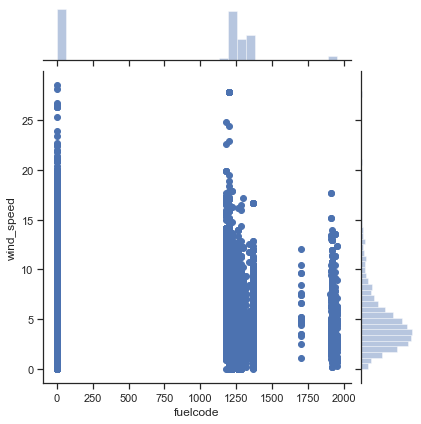

In [35]:
g = sns.jointplot("fuelcode", "wind_speed", emstat_west)

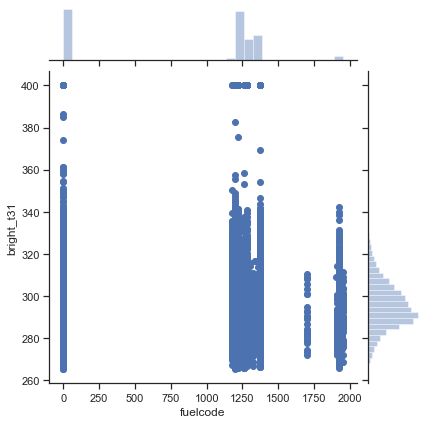

In [36]:
g = sns.jointplot("fuelcode", "bright_t31", emstat_west)

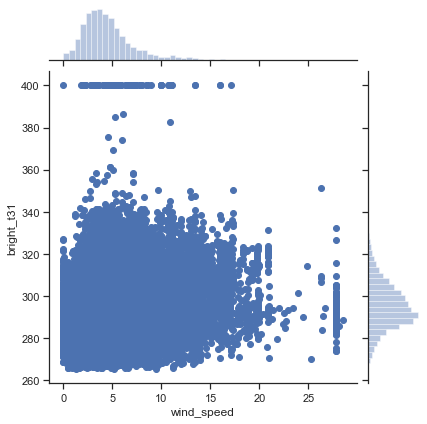

In [37]:
g = sns.jointplot("wind_speed", "bright_t31", emstat_west)

### Following Regression Plot shows multivariate relationships between pairings of the dataset features

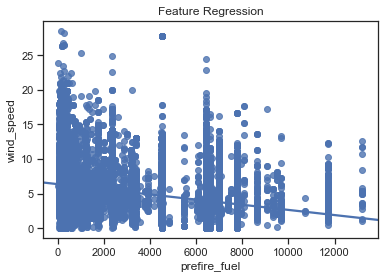

In [38]:
sns.regplot(x="prefire_fuel", y="wind_speed", data=emstat_west,  ci=None, x_jitter=.05)
plt.title("Feature Regression")
plt.show()

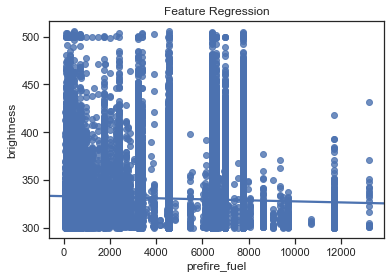

In [39]:
sns.regplot(x="prefire_fuel", y="brightness", data=emstat_west,  ci=None, x_jitter=.05)
plt.title("Feature Regression")
plt.show()

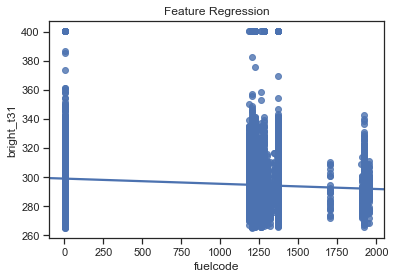

In [40]:
sns.regplot(x="fuelcode", y="bright_t31", data=emstat_west,  ci=None, x_jitter=.05)
plt.title("Feature Regression")
plt.show()

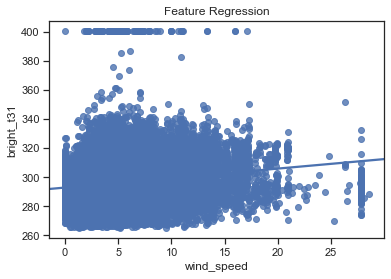

In [41]:
sns.regplot(x="wind_speed", y="bright_t31", data=emstat_west,  ci=None, x_jitter=.05)
plt.title("Feature Regression")
plt.show()

### Following Violin Plot shows variable distribution between bright_t31 and fire intensity 3 category

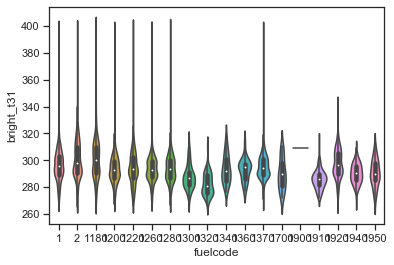

In [42]:
 ax = sns.violinplot(x="fuelcode", y="bright_t31", data=emstat_west)